# Importing Libraries And Reading Data

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import model_selection
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/diabetes_binary.csv')

In [ ]:
print (data.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# Modeling Before Balancing Data And Feature Selection

In [ ]:
#Spliting Data
X=data.drop(columns=['Diabetes_binary'])
Y=data['Diabetes_binary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41,shuffle=True)

In [ ]:
#StandardScaler
model = StandardScaler()
X_train_standardscaler = model.fit_transform(X_train)
X_test_standardscaler = model.transform(X_test)

In [ ]:
#logisticRegression
LogReg = LogisticRegression(solver='saga',random_state = 30)
LogReg.fit(X_train_standardscaler, Y_train)
y_pred = LogReg.predict(X_test_standardscaler)

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_test, y_pred)
print(cr)
cm=confusion_matrix(Y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     54619
         1.0       0.54      0.16      0.25      8801

    accuracy                           0.86     63420
   macro avg       0.71      0.57      0.59     63420
weighted avg       0.83      0.86      0.83     63420

[[53416  1203]
 [ 7395  1406]]


In [ ]:
#SVM
SVM=svm.LinearSVC(random_state=65)
SVM.fit(X_train_standardscaler, Y_train)
y_pred = SVM.predict(X_test_standardscaler)

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_test, y_pred)
print(cr)
cm=confusion_matrix(Y_test, y_pred)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     54619
         1.0       0.61      0.07      0.13      8801

    accuracy                           0.86     63420
   macro avg       0.74      0.53      0.53     63420
weighted avg       0.83      0.86      0.82     63420

[[54202   417]
 [ 8160   641]]


In [ ]:
#DecisionTree
DecTree=tree.DecisionTreeClassifier(random_state = 31)
DecTree.fit(X_train, Y_train)
y_pred=DecTree.predict(X_test)

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_test, y_pred)
print(cr)
cm=confusion_matrix(Y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     54619
         1.0       0.29      0.33      0.31      8801

    accuracy                           0.80     63420
   macro avg       0.59      0.60      0.60     63420
weighted avg       0.81      0.80      0.80     63420

[[47636  6983]
 [ 5905  2896]]


In [ ]:
#RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

#ClassificationReport And ConfusionMatrix
cm=confusion_matrix(Y_test, y_pred)
cr=classification_report(Y_test, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     54619
         1.0       0.48      0.17      0.25      8801

    accuracy                           0.86     63420
   macro avg       0.68      0.57      0.59     63420
weighted avg       0.82      0.86      0.83     63420

[[53004  1615]
 [ 7310  1491]]


# Balancing Data Using OverSampling

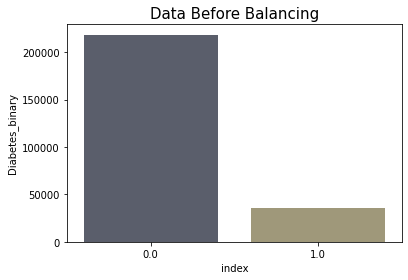

In [ ]:
DataBeforeBalancing=data['Diabetes_binary'].value_counts().reset_index()
sns.barplot(x="index",y="Diabetes_binary",data=DataBeforeBalancing,palette="cividis")
plt.title("Data Before Balancing", fontsize=15)
plt.show()

In [ ]:
# Separating classes
class_count_0, class_count_1 = data['Diabetes_binary'].value_counts()
class_0 = data[data['Diabetes_binary'] == 0]
class_1 = data[data['Diabetes_binary'] == 1]

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)
data_OverSampling = pd.concat([class_1_over, class_0], axis=0, ignore_index=True)

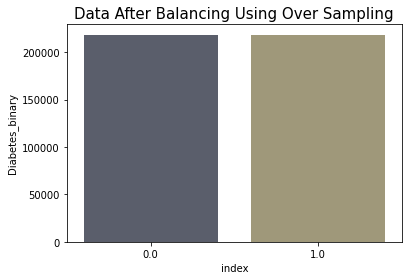

In [ ]:
OverSampling=data_OverSampling['Diabetes_binary'].value_counts().reset_index()
sns.barplot(x="index",y="Diabetes_binary", data=OverSampling, palette="cividis")
plt.title("Data After Balancing Using Over Sampling", fontsize=15)
plt.show()

# Balncing Data Using UnderSampling

In [ ]:
class_0_under = class_0.sample(class_count_1)
data_UnderSampling = pd.concat([class_0_under, class_1], axis=0,ignore_index=True)

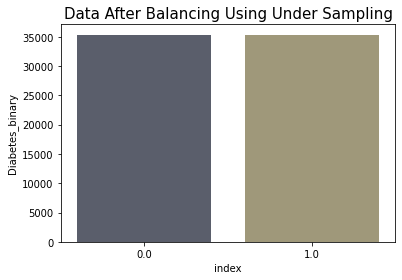

In [ ]:
UnderSampling=data_UnderSampling['Diabetes_binary'].value_counts().reset_index()
sns.barplot(x="index",y="Diabetes_binary", data=UnderSampling, palette="cividis")
plt.title("Data After Balancing Using Under Sampling", fontsize=15)
plt.show()

# Balancing Data Using SMOTE

In [ ]:
X=data.drop(columns=['Diabetes_binary'])
y=data['Diabetes_binary']
smote = SMOTE()
X, y = smote.fit_resample(X, y)
data_SMOTE = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

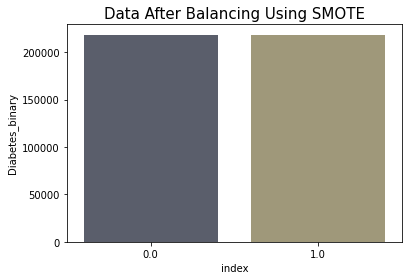

In [ ]:
SMOTE=data_SMOTE['Diabetes_binary'].value_counts().reset_index()
sns.barplot(x="index",y="Diabetes_binary",data=SMOTE,palette="cividis")
plt.title("Data After Balancing Using SMOTE", fontsize=15)
plt.show()

# Balancing Data Using SMOTETomek

In [ ]:
X=data.drop(columns=['Diabetes_binary'])
y=data['Diabetes_binary']
smt = SMOTETomek(random_state=42)
xsmtk, ysmtk = smt.fit_resample(X, y)
data_SMOTETomek = pd.concat([pd.DataFrame(xsmtk), pd.DataFrame(ysmtk)], axis=1)

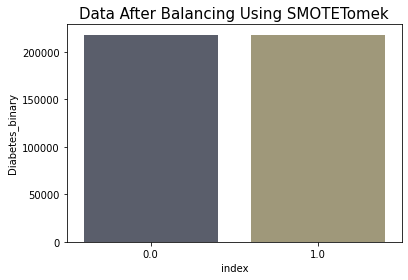

In [ ]:
SMOTETomek=data_SMOTETomek['Diabetes_binary'].value_counts().reset_index()
sns.barplot(x="index",y="Diabetes_binary",data=SMOTETomek,palette="cividis")
plt.title("Data After Balancing Using SMOTETomek", fontsize=15)
plt.show()

# Feature Selection

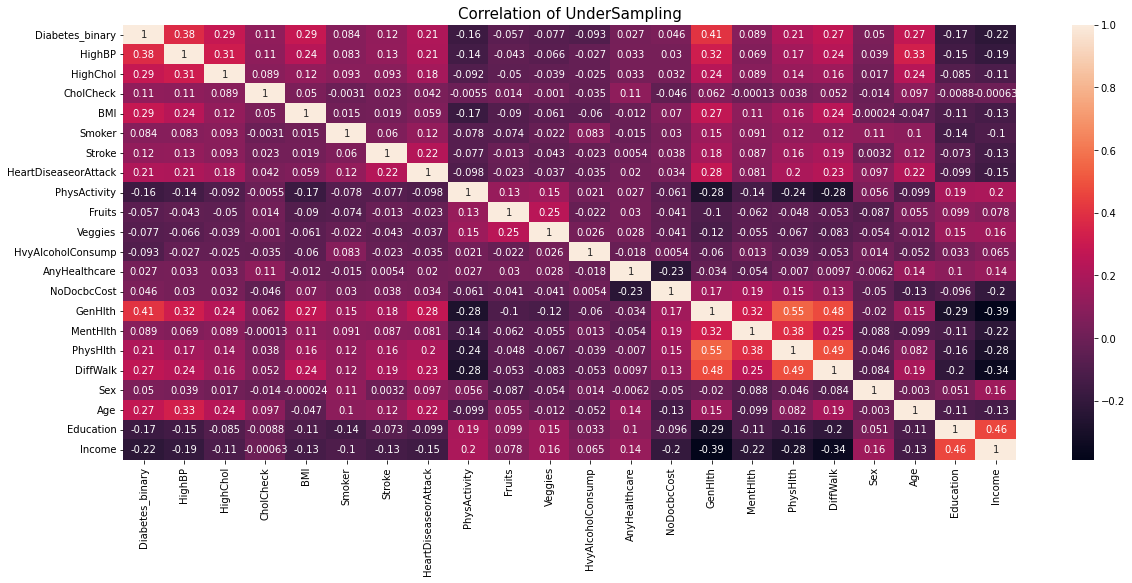

In [ ]:
corr = data_UnderSampling.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation of UnderSampling", fontsize=15)
plt.show()

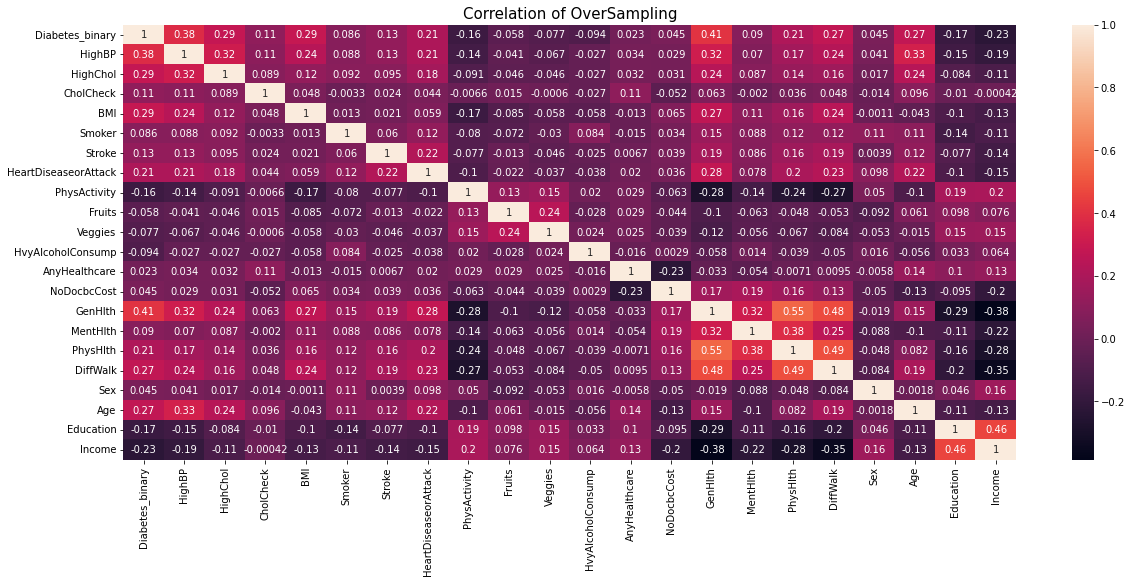

In [ ]:
corr = data_OverSampling.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation of OverSampling", fontsize=15)
plt.show()

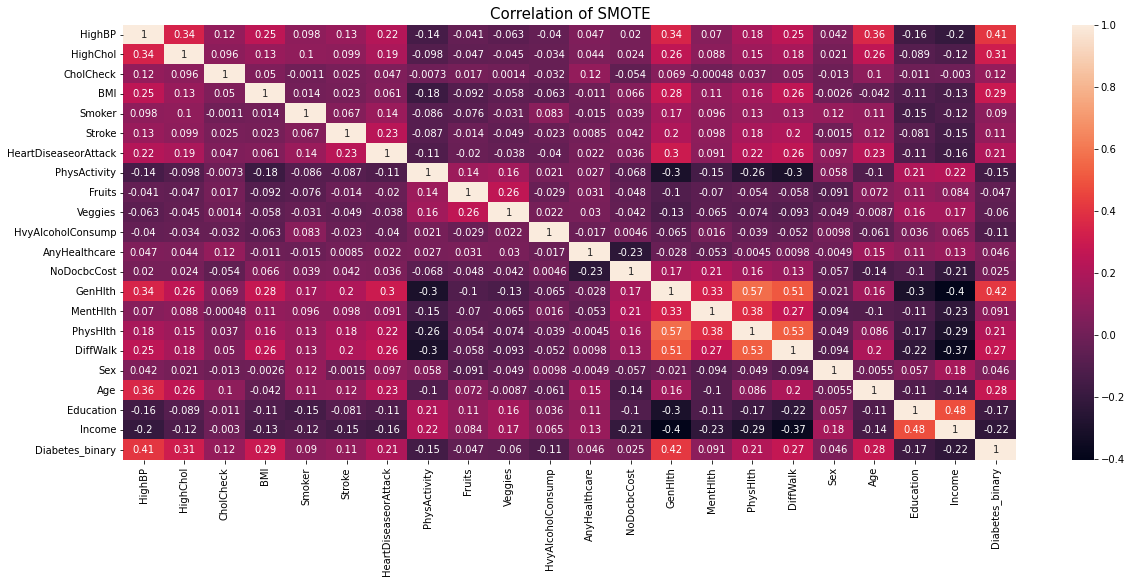

In [ ]:
corr = data_SMOTE.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation of SMOTE", fontsize=15)
plt.show()

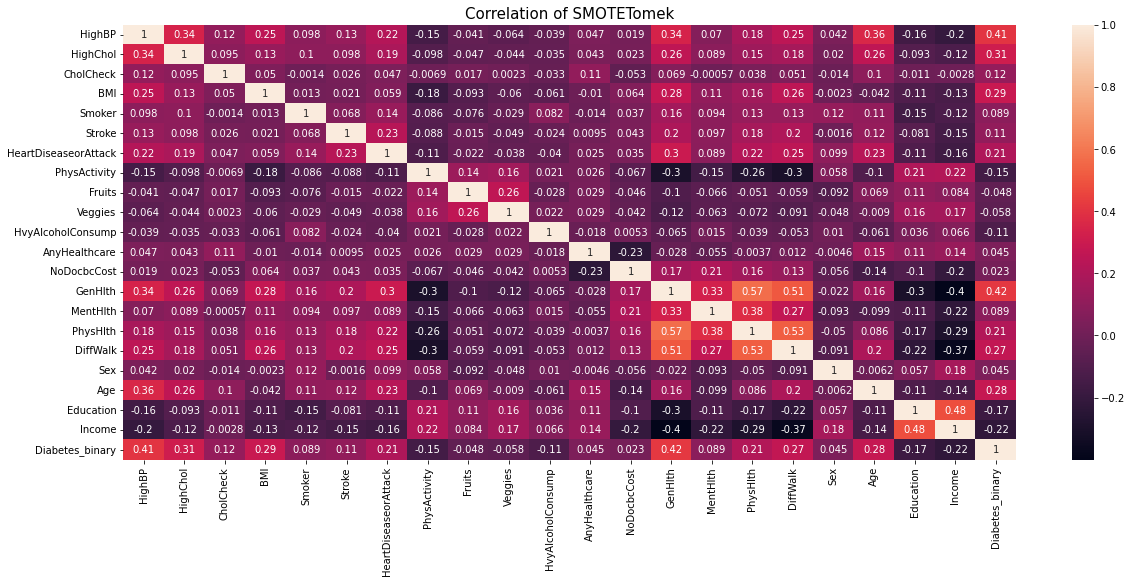

In [ ]:
corr = data_SMOTETomek.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation of SMOTETomek", fontsize=15)
plt.show()

In [ ]:
features=['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']
def FeatureSelection():
  for z in features:
    if( abs(x[z].corr(y)) < 0.1):
      del x[z]

In [ ]:
x=data_UnderSampling.drop(columns=['Diabetes_binary'])
y=data_UnderSampling['Diabetes_binary']
FeatureSelection()
data_UnderSamplingnew = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
data_UnderSamplingnew.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,12.0,5.0,5.0,0.0
1,0.0,0.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,6.0,8.0,0.0
2,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,5.0,6.0,0.0
3,1.0,0.0,1.0,23.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,12.0,6.0,6.0,0.0
4,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,5.0,5.0,8.0,0.0


In [ ]:
x=data_OverSampling.drop(columns=['Diabetes_binary'])
y=data_OverSampling['Diabetes_binary']
FeatureSelection()
data_OverSamplingnew = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
data_OverSamplingnew.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,32.0,1.0,1.0,1.0,0.0,4.0,20.0,1.0,11.0,5.0,6.0,1.0
1,1.0,1.0,1.0,51.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,8.0,4.0,2.0,1.0
2,1.0,1.0,1.0,25.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,9.0,6.0,8.0,1.0
3,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,4.0,30.0,1.0,9.0,5.0,1.0,1.0
4,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,5.0,8.0,1.0


In [ ]:
x=data_SMOTE.drop(columns=['Diabetes_binary'])
y=data_SMOTE['Diabetes_binary']
FeatureSelection()
data_SMOTEnew = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
data_SMOTEnew.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,0.0


In [ ]:
x=data_SMOTETomek.drop(columns=['Diabetes_binary'])
y=data_SMOTETomek['Diabetes_binary']
FeatureSelection()
data_SMOTETomeknew = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
data_SMOTETomeknew.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,0.0


# Modeling Using OverSampling

In [ ]:
#Spliting Data
XO=data_OverSamplingnew.drop(columns=['Diabetes_binary'])
YO=data_OverSamplingnew['Diabetes_binary']
X_trainO, X_testO, Y_trainO, Y_testO = train_test_split(XO, YO, test_size = 0.3, random_state = 41,shuffle=True)

In [ ]:
#StandardScaler
model = StandardScaler()
X_train_standardscalerO = model.fit_transform(X_trainO)
X_test_standardscalerO = model.transform(X_testO)

In [ ]:
#logisticRegression
LogRegO = LogisticRegression(solver='saga',random_state = 0)
LogRegO.fit(X_train_standardscalerO, Y_trainO)
y_predO = LogRegO.predict(X_test_standardscalerO)

#saving logisticRegression Model
logisticRegressiono = 'LogisticRegression_Over.sav'
pickle.dump(LogRegO, open(logisticRegressiono, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testO, y_predO)
print(cr)
cm=confusion_matrix(Y_testO, y_predO)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     65467
         1.0       0.74      0.77      0.75     65534

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001

[[47391 18076]
 [15394 50140]]


In [ ]:
#SVM
SVM_O=svm.LinearSVC(random_state=45)
SVM_O.fit(X_train_standardscalerO, Y_trainO)
y_predO = SVM_O.predict(X_test_standardscalerO)

#saving SVM Model
svmo = 'svmOver.sav'
pickle.dump(SVM_O, open(svmo, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testO, y_predO)
print(cr)
cm=confusion_matrix(Y_testO, y_predO)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     65467
         1.0       0.73      0.77      0.75     65534

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001

[[46969 18498]
 [15026 50508]]


In [ ]:
#DecisionTree
DecTree_O=tree.DecisionTreeClassifier()
DecTree_O.fit(X_trainO, Y_trainO)
y_predO=DecTree_O.predict(X_testO)

#saving DecisionTree Model
deciontree = 'deciontreeOVER.sav'
pickle.dump(DecTree_O, open(deciontree, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testO, y_predO)
print(cr)
cm=confusion_matrix(Y_testO, y_predO)
print(cm)

              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     65467
         1.0       0.85      0.95      0.90     65534

    accuracy                           0.89    131001
   macro avg       0.90      0.89      0.89    131001
weighted avg       0.90      0.89      0.89    131001

[[54221 11246]
 [ 3197 62337]]


In [ ]:
#RandomForestClassifier
rfc_O = RandomForestClassifier(random_state = 42)
rfc_O.fit(X_trainO, Y_trainO)
y_predO = rfc_O.predict(X_testO)

#saving DecisionTree Model
rfc_o = 'RandomForestOverSampling.sav'
pickle.dump(rfc_O, open(rfc_o, 'wb'))

#ClassificationReport And ConfusionMatrix
cm=confusion_matrix(Y_testO, y_predO)
cr=classification_report(Y_testO, y_predO)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     65467
         1.0       0.86      0.96      0.91     65534

    accuracy                           0.90    131001
   macro avg       0.91      0.90      0.90    131001
weighted avg       0.91      0.90      0.90    131001

[[55574  9893]
 [ 2789 62745]]


# Modeling Using UnderSampling

In [ ]:
XU=data_UnderSamplingnew.drop(columns=['Diabetes_binary'])
YU=data_UnderSamplingnew['Diabetes_binary']
X_trainU, X_testU, Y_trainU, Y_testU = train_test_split(XU, YU, test_size = 0.3, random_state = 41,shuffle=True)

In [ ]:
#StandardScaler
model = StandardScaler()
X_train_standardscalerU = model.fit_transform(X_trainU)
X_test_standardscalerU = model.transform(X_testU)

In [ ]:
#logisticRegression
LogRegU = LogisticRegression(solver='saga',random_state = 0)
LogRegU.fit(X_train_standardscalerU, Y_trainU)
y_predU = LogRegU.predict(X_test_standardscalerU)

#saving logisticRegression Model
logisticRegressionUnder = 'LogisticRegression_UnderSampling.sav'
pickle.dump(LogRegU, open(logisticRegressionUnder, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testU, y_predU)
print(cr)
cm=confusion_matrix(Y_testU, y_predU)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     10593
         1.0       0.74      0.76      0.75     10615

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7701 2892]
 [2558 8057]]


In [ ]:
#SVM
SVM_UnderSampling=svm.LinearSVC(random_state=45)
SVM_UnderSampling.fit(X_train_standardscalerU, Y_trainU)
y_predU = SVM_UnderSampling.predict(X_test_standardscalerU)

#saving SVM Model
svmunder = 'svmUnder.sav'
pickle.dump(SVM_UnderSampling, open(svmunder, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testU, y_predU)
print(cr)
cm=confusion_matrix(Y_testU, y_predU)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10593
         1.0       0.73      0.76      0.75     10615

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7640 2953]
 [2507 8108]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#DecisionTree
DecTreeU=tree.DecisionTreeClassifier()
DecTreeU.fit(X_trainU, Y_trainU)
y_predU=DecTreeU.predict(X_testU)

#saving DecisionTree Model
deciontree = 'DecionTreeUnder.sav'
pickle.dump(DecTreeU, open(deciontree, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testU, y_predU)
print(cr)
cm=confusion_matrix(Y_testU, y_predU)
print(cm)

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67     10593
         1.0       0.67      0.63      0.65     10615

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208

[[7284 3309]
 [3880 6735]]


In [ ]:
#RandomForestClassifier
rfcU = RandomForestClassifier(random_state = 42)
rfcU.fit(X_trainU, Y_trainU)
y_pred = rfcU.predict(X_testU)

#saving DecisionTree Model
Rand = 'RandomForestUnder.sav'
pickle.dump(rfcU, open(Rand, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testU, y_pred)
print(cr)
cm=confusion_matrix(Y_testU, y_predU)
print(cm)

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     10593
         1.0       0.71      0.74      0.73     10615

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208

[[7284 3309]
 [3880 6735]]


# Modeling Using SMOTE


In [ ]:
#Spliting Data
XS=data_SMOTEnew.drop(columns=['Diabetes_binary'])
YS=data_SMOTEnew['Diabetes_binary']
X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(XS, YS, test_size = 0.3, random_state = 41,shuffle=True)

In [ ]:
#StandardScaler
model = StandardScaler()
X_train_standardscalerS = model.fit_transform(X_trainS)
X_test_standardscalerS = model.transform(X_testS)

In [ ]:
#logisticRegression
LogRegS = LogisticRegression(solver = 'saga',random_state = 91)
LogRegS.fit(X_train_standardscalerS, Y_trainS)
y_predS = LogRegS.predict(X_test_standardscalerS)

#saving logisticRegression Model
logisticRegression = 'LogisticRegressionSMOTE.sav'
pickle.dump(LogRegS, open(logisticRegression, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testS, y_predS)
print(cr)
cm=confusion_matrix(Y_testS, y_predS)
print(cm)

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     65488
         1.0       0.74      0.78      0.76     65513

    accuracy                           0.75    131001
   macro avg       0.76      0.75      0.75    131001
weighted avg       0.76      0.75      0.75    131001

[[47555 17933]
 [14223 51290]]


In [ ]:
#SVM
SVM_S = svm.LinearSVC(random_state=45)
SVM_S.fit(X_train_standardscalerS, Y_trainS)
y_pred = SVM_S.predict(X_test_standardscalerS)

#saving SVM Model
svmS = 'svmSMOTE.sav'
pickle.dump(SVM_S, open(svmS, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testS, y_pred)
print(cr)
cm=confusion_matrix(Y_testS, y_pred)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75     65488
         1.0       0.74      0.79      0.76     65513

    accuracy                           0.75    131001
   macro avg       0.76      0.75      0.75    131001
weighted avg       0.76      0.75      0.75    131001

[[47015 18473]
 [13709 51804]]


In [ ]:
#DecisionTree
DecTree_S=tree.DecisionTreeClassifier(random_state = 0)
DecTree_S.fit(X_trainS, Y_trainS)
y_pred=DecTree_S.predict(X_testS)

#saving DecisionTree Model
deciontree = 'DecionTreeSMOTE.sav'
pickle.dump(DecTree_S, open(deciontree, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testS, y_pred)
print(cr)
cm=confusion_matrix(Y_testS, y_pred)
print(cm)

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     65488
         1.0       0.88      0.87      0.88     65513

    accuracy                           0.88    131001
   macro avg       0.88      0.88      0.88    131001
weighted avg       0.88      0.88      0.88    131001

[[57980  7508]
 [ 8335 57178]]


In [ ]:
#RandomForestClassifier
rfc_S = RandomForestClassifier(random_state = 42)
rfc_S.fit(X_trainS, Y_trainS)
y_predS = rfc_S.predict(X_testS)

#saving RandomForset Model
rfc_Ss = 'RandomForestSMOTE.sav'
pickle.dump(rfc_S, open(rfc_Ss, 'wb'))

#ClassificationReport And ConfusionMatrix
cm=confusion_matrix(Y_testS, y_predS)
cr=classification_report(Y_testS, y_predS)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     65488
         1.0       0.94      0.88      0.91     65513

    accuracy                           0.91    131001
   macro avg       0.91      0.91      0.91    131001
weighted avg       0.91      0.91      0.91    131001

[[61593  3895]
 [ 8025 57488]]


# Modeling Using SMOTETomek

In [ ]:
X1=data_SMOTETomeknew.drop(columns=['Diabetes_binary'])
Y1=data_SMOTETomeknew['Diabetes_binary']
X_trainST, X_testST, Y_trainST, Y_testST = train_test_split(X1, Y1, test_size = 0.3, random_state = 41,shuffle=True)

In [ ]:
model = StandardScaler()
X_train_standardscalerST = model.fit_transform(X_trainST)
X_test_standardscalerST = model.transform(X_testST)

In [ ]:
#LogisticRegression
LogReg_ST = LogisticRegression(solver='saga',random_state = 0)
LogReg_ST.fit(X_train_standardscalerST, Y_trainST)
y_predST = LogReg_ST.predict(X_test_standardscalerST)

#saving logisticRegression Model
logisticRegression_ST = 'LogisticRegression_ST.sav'
pickle.dump(LogReg_ST, open(logisticRegression_ST, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testST, y_predST)
print(cr)
cm=confusion_matrix(Y_testST, y_predST)
print(cm)

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75     65551
         1.0       0.74      0.78      0.76     65384

    accuracy                           0.75    130935
   macro avg       0.75      0.75      0.75    130935
weighted avg       0.75      0.75      0.75    130935

[[47420 18131]
 [14201 51183]]


In [ ]:
#SVM
SVM_ST=svm.LinearSVC(random_state=45)
SVM_ST.fit(X_train_standardscalerST , Y_trainST)
y_predST = SVM_ST.predict(X_test_standardscalerST)

#saving SVM Model
svm_ST = 'svmSMOTETomek.sav'
pickle.dump(SVM_ST, open(svm_ST, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testST, y_predST)
print(cr)
cm=confusion_matrix(Y_testST, y_predST)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74     65551
         1.0       0.74      0.79      0.76     65384

    accuracy                           0.75    130935
   macro avg       0.76      0.75      0.75    130935
weighted avg       0.76      0.75      0.75    130935

[[46940 18611]
 [13658 51726]]


In [ ]:
#DecisionTree
DecTree_ST=tree.DecisionTreeClassifier()
DecTree_ST.fit(X_trainST, Y_trainST)
y_predST=DecTree_ST.predict(X_testST)

#saving DecisionTree Model
deciontree_ST = 'DecionTreeSMOTETomek.sav'
pickle.dump(DecTree_ST, open(deciontree_ST, 'wb'))

#ClassificationReport And ConfusionMatrix
cr=classification_report(Y_testST, y_predST)
print(cr)
cm=confusion_matrix(Y_testST, y_predST)
print(cm)

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     65551
         1.0       0.89      0.87      0.88     65384

    accuracy                           0.88    130935
   macro avg       0.88      0.88      0.88    130935
weighted avg       0.88      0.88      0.88    130935

[[58208  7343]
 [ 8376 57008]]


In [ ]:
#RandomForestClassifier
rfc_ST = RandomForestClassifier(random_state = 42)
rfc_ST.fit(X_trainST, Y_trainST)
y_predST = rfc_ST.predict(X_testST)

#saving DecisionTree Model
Rand_ST = 'RandomForestSMOTETomek.sav'
pickle.dump(rfc_ST, open(Rand_ST, 'wb'))

#ClassificationReport And ConfusionMatrix
cm=confusion_matrix(Y_testST, y_predST)
cr=classification_report(Y_testST, y_predST)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     65551
         1.0       0.94      0.88      0.91     65384

    accuracy                           0.91    130935
   macro avg       0.91      0.91      0.91    130935
weighted avg       0.91      0.91      0.91    130935

[[61578  3973]
 [ 8037 57347]]


# Creating New DataSet and Preprocessing it

In [ ]:
#data_new = pd.read_csv('')

In [ ]:
data_new = data_UnderSampling.sample(frac=0.30)

In [ ]:
data_new.count()

Diabetes_binary         21208
HighBP                  21208
HighChol                21208
CholCheck               21208
BMI                     21208
Smoker                  21208
Stroke                  21208
HeartDiseaseorAttack    21208
PhysActivity            21208
Fruits                  21208
Veggies                 21208
HvyAlcoholConsump       21208
AnyHealthcare           21208
NoDocbcCost             21208
GenHlth                 21208
MentHlth                21208
PhysHlth                21208
DiffWalk                21208
Sex                     21208
Age                     21208
Education               21208
Income                  21208
dtype: int64

In [ ]:
x=data_new.drop(columns=['Diabetes_binary'])
y=data_new['Diabetes_binary']
FeatureSelection()
data_new1 = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
data_new1.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_binary
40179,0.0,1.0,1.0,21.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,4.0,5.0,6.0,1.0
54827,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,8.0,4.0,8.0,1.0
32151,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,9.0,3.0,5.0,0.0
6391,0.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,7.0,4.0,6.0,0.0
53174,0.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,5.0,5.0,1.0


In [ ]:
X_new=data_new1.drop(columns=['Diabetes_binary'])
Y_new=data_new1['Diabetes_binary']

#Using StanadradScaler
model = StandardScaler()
X_new_StanderScaler = model.fit_transform(X_new)

# Testing With New Data

In [ ]:
#LogisticRegressionOverSampling
loaded_model1 = pickle.load(open('/content/LogisticRegression_Over.sav', 'rb'))
y_pred = loaded_model1.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10517
         1.0       0.74      0.76      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7613 2904]
 [2561 8130]]


In [ ]:
#LogisticRegressionUnderSampling
loaded_model1 = pickle.load(open('/content/LogisticRegression_UnderSampling.sav', 'rb'))
y_pred = loaded_model1.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10517
         1.0       0.74      0.76      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7607 2910]
 [2558 8133]]


In [ ]:
#LogisticRegressionSMOTE
loaded_model1 = pickle.load(open('/content/LogisticRegressionSMOTE.sav', 'rb'))
y_pred = loaded_model1.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10517
         1.0       0.74      0.76      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7603 2914]
 [2572 8119]]


In [ ]:
#LogisticRegressionSMOTETomek
loaded_model1 = pickle.load(open('/content/LogisticRegression_ST.sav', 'rb'))
y_pred = loaded_model1.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     10517
         1.0       0.74      0.76      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7604 2913]
 [2567 8124]]


In [ ]:
#SVMOverSampling
SVM = pickle.load(open('/content/svmOver.sav', 'rb'))
y_pred = SVM.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10517
         1.0       0.73      0.77      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7558 2959]
 [2497 8194]]


In [ ]:
#SVMUnderSampling
SVM = pickle.load(open('/content/svmUnder.sav', 'rb'))
y_pred = SVM.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10517
         1.0       0.73      0.77      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7557 2960]
 [2507 8184]]


In [ ]:
#SVMSMOTE
SVM = pickle.load(open('/content/svmSMOTE.sav', 'rb'))
y_pred = SVM.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10517
         1.0       0.73      0.77      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7533 2984]
 [2475 8216]]


In [ ]:
#SVMSMOTETomek
SVM = pickle.load(open('/content/svmSMOTETomek.sav', 'rb'))
y_pred = SVM.predict(X_new_StanderScaler)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10517
         1.0       0.73      0.77      0.75     10691

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

[[7530 2987]
 [2469 8222]]


In [ ]:
#DecisionTeeOverSampling
DecisionTree = pickle.load(open('/content/deciontreeOVER.sav', 'rb'))
y_pred = DecisionTree.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     10517
         1.0       0.92      0.95      0.94     10691

    accuracy                           0.93     21208
   macro avg       0.93      0.93      0.93     21208
weighted avg       0.93      0.93      0.93     21208

[[ 9593   924]
 [  491 10200]]


In [ ]:
#DecisionTeeUnderSam
DecisionTree = pickle.load(open('/content/DecionTreeUnder.sav', 'rb'))
y_pred = DecisionTree.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     10517
         1.0       0.90      0.85      0.88     10691

    accuracy                           0.88     21208
   macro avg       0.88      0.88      0.88     21208
weighted avg       0.88      0.88      0.88     21208

[[9464 1053]
 [1556 9135]]


In [ ]:
#DecisionTeeSMOTE
DecisionTree = pickle.load(open('/content/DecionTreeSMOTE.sav', 'rb'))
y_pred = DecisionTree.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85     10517
         1.0       0.95      0.70      0.80     10691

    accuracy                           0.83     21208
   macro avg       0.85      0.83      0.83     21208
weighted avg       0.85      0.83      0.82     21208

[[10101   416]
 [ 3237  7454]]


In [ ]:
#DecisionTeeSMOTETomek
DecisionTree = pickle.load(open('/content/DecionTreeSMOTETomek.sav', 'rb'))
y_pred = DecisionTree.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85     10517
         1.0       0.95      0.70      0.80     10691

    accuracy                           0.83     21208
   macro avg       0.85      0.83      0.83     21208
weighted avg       0.85      0.83      0.83     21208

[[10091   426]
 [ 3222  7469]]


In [ ]:
#RandomForestOverSampling
rfc = pickle.load(open('/content/RandomForestOverSampling.sav', 'rb'))
y_pred = rfc.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94     10517
         1.0       0.92      0.96      0.94     10691

    accuracy                           0.94     21208
   macro avg       0.94      0.94      0.94     21208
weighted avg       0.94      0.94      0.94     21208

[[ 9621   896]
 [  418 10273]]


In [ ]:
#RandomForestUnderSampling
rfc = pickle.load(open('/content/RandomForestUnder.sav', 'rb'))
y_pred = rfc.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     10517
         1.0       0.89      0.89      0.89     10691

    accuracy                           0.89     21208
   macro avg       0.89      0.89      0.89     21208
weighted avg       0.89      0.89      0.89     21208

[[9384 1133]
 [1129 9562]]


In [ ]:
#RandomForestSMOTE
rfc = pickle.load(open('/content/RandomForestSMOTE.sav', 'rb'))
y_pred = rfc.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86     10517
         1.0       0.97      0.70      0.81     10691

    accuracy                           0.84     21208
   macro avg       0.86      0.84      0.83     21208
weighted avg       0.87      0.84      0.83     21208

[[10259   258]
 [ 3198  7493]]


In [ ]:
#RandomForestSMOTETomek
rfc = pickle.load(open('/content/RandomForestSMOTETomek.sav', 'rb'))
y_pred = rfc.predict(X_new)
cm = confusion_matrix(Y_new, y_pred)
cr = classification_report(Y_new, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85     10517
         1.0       0.96      0.70      0.81     10691

    accuracy                           0.84     21208
   macro avg       0.86      0.84      0.83     21208
weighted avg       0.86      0.84      0.83     21208

[[10217   300]
 [ 3174  7517]]
